In [46]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import time
import os
os.listdir()

['artists.csv',
 '.ipynb_checkpoints',
 'MyData1',
 'links_threshold3.json',
 'MyData2',
 'artist_clusters.csv',
 'spotify_network',
 'MyData3',
 'df_artist_ids.csv',
 'artists_threshold3.csv',
 'artists_threshold10.csv',
 'artists_threshold4.csv',
 'links_threshold4.json',
 'Spotify analysis.ipynb',
 'MyData230609']

In [2]:
os.listdir('MyData230609/')

['Follow.json',
 'Payments.json',
 'Userdata.json',
 'Inferences.json',
 'Playlist1.json',
 'Identifiers.json',
 'SearchQueries.json',
 'StreamingHistory1.json',
 'StreamingHistory0.json',
 'YourLibrary.json',
 'Marquee.json',
 'Read_Me_First.pdf']

In [3]:
pd.read_json('MyData3/endsong_0.json').sample(5)#.spotify_track_uri

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
4648,2022-02-16T23:36:19Z,boskkanator,"Android OS 11 API 30 (motorola, motorola edge ...",175780,GB,213.205.240.174,unknown,Noticed I cried - Flume Remix,PinkPantheress,to hell with it,...,None,None,None,trackdone,trackdone,False,NaN,False,1645054401212,0.0
5189,2021-01-13T18:03:55Z,boskkanator,"Android OS 10 API 29 (motorola, moto g(7) power)",430400,GB,80.43.80.185,unknown,Criterion - Original Mix,Misanthrop,Perfect Happiness,...,None,None,None,trackdone,trackdone,True,NaN,False,1610560600280,0.0
3234,2017-07-17T08:15:49Z,boskkanator,"iOS 10.2.1 (iPhone6,2)",207702,GB,213.205.194.249,unknown,New Born Love,D/R/U/G/S,New Born Love,...,None,None,None,fwdbtn,endplay,True,NaN,False,1500279141199,0.0
8759,2017-12-12T12:37:49Z,boskkanator,Linux [x86-64 0],203946,GB,87.224.74.69,unknown,Starlite,NxWorries,Yes Lawd!,...,None,None,None,trackdone,trackdone,False,NaN,False,1513082064632,0.0
16122,2023-01-17T13:31:34Z,boskkanator,android,170226,GB,213.205.200.55,unknown,1 More Than 6,Clavish,Rap Game Awful,...,None,None,None,trackdone,trackdone,False,0.0,False,1673962124,0.0


In [4]:
pd.read_json('MyData3/endsong_0.json').columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [7]:
df = pd.concat([
    pd.read_json('MyData230609/StreamingHistory0.json'),
    pd.read_json('MyData230609/StreamingHistory1.json')
], ignore_index=True)
df.sample()

,endTime,artistName,trackName,msPlayed
3802,2022-09-07 20:15,Hot Chip,Guilty,242659


In [8]:
listen_counts = df.artistName.value_counts()
listen_counts

artistName
Clavish          263
Yaeji            239
Flume            219
Mount Kimbie     217
Bloc Party       206
                ... 
CTM                1
Zeeky Beats        1
Yehezkel Raz       1
Jadu Jadu          1
Lorenzo Senni      1
Name: count, Length: 3168, dtype: int64

In [28]:
# threshold = 9
threshold = 3
listen_counts_threshold = listen_counts[listen_counts >= threshold]
len(listen_counts_threshold)

1004

In [29]:
# Get access token
headers={'Content-Type': 'application/x-www-form-urlencoded'}
data="grant_type=client_credentials&client_id=817512b9604d4dd3af2c1ae44aecb0e6&client_secret=1d5d150034174dfe968d7242795f2cdf"
r = requests.post("https://accounts.spotify.com/api/token", headers=headers, data=data)
token = r.json()['access_token']

In [31]:
# get artist info
popularities = []
genre_lists = []
for artist, count in tqdm(listen_counts_threshold.items()):
#     time.sleep(1)
    url = "https://api.spotify.com/v1/search"
    payload = {'q': artist, 'type': 'artist'}
    headers = {'Authorization': 'Bearer  ' + token}
    r = requests.get(url, headers=headers, params=payload)
    artist_info = r.json()['artists']['items'][0]
    genre_lists.append(artist_info['genres'])
    popularities.append(artist_info['popularity'])

1004it [14:20,  1.17it/s]


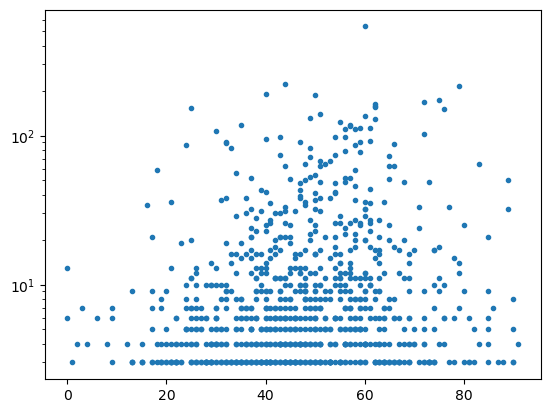

In [33]:
plt.plot(popularities, listen_counts_threshold.values, '.')
plt.yscale('log')

In [15]:
df_artists = pd.DataFrame({
    'artistName': listen_counts_threshold.index,
    'count': listen_counts_threshold.values,
    'genres': genre_lists,
    'popularity': popularities
})
df_artists.to_csv('artists_threshold4.csv')
df_artists.head()

,artistName,count,genres,popularity
0,Clavish,263,"[uk drill, uk hip hop]",62
1,Yaeji,239,"[alternative r&b, art pop, escape room, experi...",54
2,Flume,219,"[australian dance, australian electropop, aust...",72
3,Mount Kimbie,217,"[electra, electronica, future garage, indie so...",51
4,Bloc Party,206,"[alternative dance, alternative rock, dance-pu...",60


In [16]:
list(set([genre for l in genre_lists for genre in l]))

['uk house',
 'spectra',
 'ghanaian alternative',
 'bassline',
 'modern alternative rock',
 'nu age',
 'english indie rock',
 'electra',
 'hiplife',
 'french dnb',
 'arab experimental',
 'australian experimental',
 'rock',
 'neo-synthpop',
 'focus',
 'afrofuturism',
 'alternative metal',
 'grime',
 'aussietronica',
 'experimental jazz',
 'dubstep',
 'transpop',
 'oxford indie',
 'classic disco polo',
 'dream pop',
 'uk drill',
 'dance rock',
 'country rap',
 'ccm',
 'rap',
 'hypertrance',
 'balearic',
 'ukg revival',
 'ghanaian pop',
 'french psychedelic',
 'uk post-punk revival',
 'purple sound',
 'glitch hop',
 'christian music',
 'baton rouge rap',
 'corridos tumbados',
 'sierreno',
 'vapor trap',
 'funk rj',
 'uk alternative hip hop',
 'lilith',
 'modern alternative pop',
 'funk',
 'grunge',
 'disco',
 'electronica',
 'drum and bass',
 'bedroom pop',
 'dance-punk',
 'riot grrrl',
 'philly indie',
 'modern dream pop',
 'drumless hip hop',
 'seattle hip hop',
 'atl hip hop',
 'black 

### Calculate links by overlapping genres

The data so far:  
df_artists with artist names, genres as a list

To get a list of overlapping artists, loop through them all pairwise checking for non-empty genre intersections

In [17]:
df_artists.sample()

,artistName,count,genres,popularity
59,Knucks,63,"[melodic drill, uk alternative hip hop]",65


In [18]:
links = []
for i, source in df_artists.iterrows():
    for j, target in df_artists[i+1:].iterrows():
        if len(set(source.genres).intersection(set(target.genres))) > 0:
            links.append({'source': i, 'target': j})
len(links)

9289

In [19]:
links[-5:]

[{'source': 738, 'target': 740},
 {'source': 738, 'target': 758},
 {'source': 740, 'target': 758},
 {'source': 742, 'target': 754},
 {'source': 752, 'target': 756}]

In [20]:
with open('links_threshold4.json', 'w') as f:
    json.dump(links, f)

### Start from the existing data - let's look further into GENRES

In [21]:
# df_artists = pd.read_csv('artist_clusters.csv')
df_artists

,artistName,count,genres,popularity
0,Clavish,263,"[uk drill, uk hip hop]",62
1,Yaeji,239,"[alternative r&b, art pop, escape room, experi...",54
2,Flume,219,"[australian dance, australian electropop, aust...",72
3,Mount Kimbie,217,"[electra, electronica, future garage, indie so...",51
4,Bloc Party,206,"[alternative dance, alternative rock, dance-pu...",60
...,...,...,...,...
758,Nokia Mansion,4,[uk alternative hip hop],26
759,Anirudh Ravichander,4,"[desi hip hop, filmi, tamil hip hop]",82
760,Dutta,4,[uk dnb],31
761,Mungo's Hi Fi,4,"[dub punk, ragga jungle, uk reggae]",48


In [24]:
from ast import literal_eval
import itertools
import collections

In [25]:
# genre_lists = [literal_eval(genre_list) for genre_list in list(df_artists.genres.values)]
genre_lists = df_artists.genres.values
genre_lists[0]

['uk drill', 'uk hip hop']

In [26]:
counter = collections.Counter([genre for genre_list in genre_lists for genre in genre_list])
counter

Counter({'uk drill': 14,
         'uk hip hop': 51,
         'alternative r&b': 46,
         'art pop': 33,
         'escape room': 42,
         'experimental house': 3,
         'australian dance': 4,
         'australian electropop': 2,
         'australian indie': 1,
         'downtempo': 8,
         'edm': 9,
         'indietronica': 44,
         'electra': 14,
         'electronica': 36,
         'future garage': 28,
         'indie soul': 31,
         'intelligent dance music': 15,
         'wonky': 30,
         'alternative dance': 10,
         'alternative rock': 7,
         'dance-punk': 5,
         'indie rock': 17,
         'modern rock': 11,
         'neo-synthpop': 14,
         'new rave': 9,
         'scottish rock': 1,
         'uk alternative hip hop': 46,
         'abstract hip hop': 3,
         'chamber psych': 3,
         'scottish hip hop': 2,
         'alternative hip hop': 12,
         'experimental hip hop': 8,
         'industrial hip hop': 3,
         'undergro

In [27]:
counter.most_common()

[('uk hip hop', 51),
 ('alternative r&b', 46),
 ('uk alternative hip hop', 46),
 ('indietronica', 44),
 ('escape room', 42),
 ('electronica', 36),
 ('art pop', 33),
 ('indie soul', 31),
 ('wonky', 30),
 ('future garage', 28),
 ('grime', 25),
 ('hyperpop', 20),
 ('rap', 19),
 ('indie rock', 17),
 ('melodic drill', 16),
 ('uk contemporary r&b', 16),
 ('hip hop', 16),
 ('intelligent dance music', 15),
 ('uk drill', 14),
 ('electra', 14),
 ('neo-synthpop', 14),
 ('pop', 14),
 ('proto-hyperpop', 13),
 ('alternative hip hop', 12),
 ('classic dubstep', 12),
 ('modern rock', 11),
 ('chillwave', 11),
 ('deconstructed club', 11),
 ('london rap', 11),
 ('afroswing', 11),
 ('alternative dance', 10),
 ('deep dubstep', 10),
 ('spectra', 10),
 ('experimental r&b', 10),
 ('trip hop', 10),
 ('chill drill', 10),
 ('edm', 9),
 ('new rave', 9),
 ('metropopolis', 9),
 ('instrumental hip hop', 9),
 ('downtempo', 8),
 ('experimental hip hop', 8),
 ('fluxwork', 8),
 ('afrofuturism', 8),
 ('float house', 8),
 

We got  
UK HIP HOP (32) UK ALTERNATIVE HIP HOP (25)  
INDIETRONICA (29) ELECTRONICA (28)  
WONKY (23) ESCAPE ROOM (22)  


Biggest pairs

In [30]:
[itertools.combinations(l, r=2) for l in genre_lists]

[(['alternative dance',
   'alternative rock',
   'dance-punk',
   'indie rock',
   'indietronica',
   'modern rock',
   'neo-synthpop',
   'new rave',
   'scottish rock'],
  ['deconstructed club', 'escape room', 'hyperpop', 'proto-hyperpop']),
 (['alternative dance',
   'alternative rock',
   'dance-punk',
   'indie rock',
   'indietronica',
   'modern rock',
   'neo-synthpop',
   'new rave',
   'scottish rock'],
  ['melodic drill']),
 (['alternative dance',
   'alternative rock',
   'dance-punk',
   'indie rock',
   'indietronica',
   'modern rock',
   'neo-synthpop',
   'new rave',
   'scottish rock'],
  ['chillwave',
   'electronica',
   'future garage',
   'indietronica',
   'microhouse',
   'wonky']),
 (['alternative dance',
   'alternative rock',
   'dance-punk',
   'indie rock',
   'indietronica',
   'modern rock',
   'neo-synthpop',
   'new rave',
   'scottish rock'],
  ['abstract hip hop', 'art pop', 'chamber psych', 'scottish hip hop']),
 (['alternative dance',
   'alternati

In [42]:
df_artists[df_artists.artistName == 'Gold Panda'].genres.values

array([list(['chillwave', 'electronica', 'future garage', 'indietronica', 'microhouse', 'wonky'])],
      dtype=object)

## Using larger dataset

In [2]:
pd.read_json('MyData3/endsong_0.json').sample()#.spotify_track_uri

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
3669,2020-10-13T11:11:24Z,boskkanator,"Android OS 10 API 29 (motorola, moto g(7) power)",260064,GB,2.221.199.78,unknown,Underwaterfall,Bearcubs,Underwaterfall,...,None,None,None,trackdone,trackdone,False,NaN,False,1602587223681,0.0


In [3]:
pd.read_json('MyData3/endsong_0.json').columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [4]:
df = pd.concat([
    pd.read_json('MyData3/endsong_0.json'),
    pd.read_json('MyData3/endsong_1.json'),
    pd.read_json('MyData3/endsong_2.json'),
    pd.read_json('MyData3/endsong_3.json')
], ignore_index=True)
df = df[~df.spotify_track_uri.isnull()]
df.sample()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
43158,2022-08-25T12:51:32Z,boskkanator,"Android OS 11 API 30 (motorola, motorola edge ...",206947,GB,109.249.183.28,unknown,Wildfires,SAULT,Untitled (Black Is),...,None,None,None,trackdone,trackdone,False,NaN,False,1661431684046,0.0


In [5]:
# Get access token
headers={'Content-Type': 'application/x-www-form-urlencoded'}
data="grant_type=client_credentials&client_id=817512b9604d4dd3af2c1ae44aecb0e6&client_secret=1d5d150034174dfe968d7242795f2cdf"
r = requests.post("https://accounts.spotify.com/api/token", headers=headers, data=data)
token = r.json()['access_token']

In [6]:
df.spotify_track_uri.values

array(['spotify:track:47iwzQA4T55kIgMh5Gxjix',
       'spotify:track:5z2XleKRbvbiytGucM5v2D',
       'spotify:track:2FKOmbAL86ihsCln8u5OED', ...,
       'spotify:track:5YuZQg9r1qdAgF86TnrIHy',
       'spotify:track:48hc1fON0fPWDXHEKrQY0q',
       'spotify:track:43KaUAwije6PQQ9RmXRI9T'], dtype=object)

In [13]:
track_uris = [track_uri.split(':')[-1] for track_uri in df.spotify_track_uri.values]
step = 50
track_uris_chunked = [track_uris[pos:pos+step] for pos in range(0, len(df), step)]

track_names = []
artist_names = []
artist_ids = []
for track_uris in tqdm(track_uris_chunked):
    url = "https://api.spotify.com/v1/tracks"
    payload = {'ids': ','.join(track_uris)}
    headers = {'Authorization': 'Bearer  ' + token}
    r = requests.get(url, headers=headers, params=payload).json()
    for track in r['tracks']:
        track_names.append(track['name'])
        artist = track['artists'][0]
        artist_names.append(artist['name'])
        artist_ids.append(artist['id'])

100%|███████████████████████████████████████| 1164/1164 [30:39<00:00,  1.58s/it]


In [14]:
df['artist_name'] = artist_names
df['artist_ids'] = artist_ids
df['track_name'] = track_names

In [15]:
df.to_csv('df_artist_ids.csv')

### Start from large processed dataset

In [7]:
df = pd.read_csv('df_artist_ids.csv')
df.sample()

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,artist_name,artist_ids,track_name
54773,54853,2022-03-04T10:37:01Z,boskkanator,"Android OS 11 API 30 (motorola, motorola edge ...",708,GB,213.205.240.32,unknown,9696 Dream,96 Back,...,backbtn,backbtn,True,NaN,False,1646390218427,0.0,96 Back,1nj9nHPkz1IbxXEpkW1WTz,9696 Dream


In [8]:
df.columns

Index(['Unnamed: 0', 'ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'artist_name', 'artist_ids', 'track_name'],
      dtype='object')

In [9]:
artists = list(df.master_metadata_album_artist_name.value_counts()[df.master_metadata_album_artist_name.value_counts() > 200].index.values)
artists

['Grimes',
 'Sega Bodega',
 'Bloc Party',
 'Norah Jones',
 'Arca',
 'Ross from Friends',
 'Kojaque',
 'Tycho',
 'Jamie xx',
 'FKA twigs',
 'Giggs',
 'Flume',
 'Mount Kimbie',
 'Iglooghost',
 'Vegyn',
 'Tommy Genesis',
 'Yaeji',
 'Charli XCX',
 'Young Fathers',
 'Gold Panda',
 'Run The Jewels',
 'Hudson Mohawke',
 'slowthai',
 'Mr. Oizo',
 'Crookers',
 'Kano',
 'KAYTRANADA',
 'Darkstar',
 'Central Cee',
 'Rustie',
 'Miike Snow',
 'Flying Lotus',
 'Eva808',
 'Shygirl',
 'Ta-ku',
 'King Krule',
 'Giraffage',
 'Zebra Katz',
 'The xx',
 'The Streets',
 'Frederic Robinson',
 'Wiley',
 'Alfa Mist']

In [10]:
df.ts = pd.to_datetime(df.ts)

In [11]:
df.ts.dt.year

0        2021
1        2020
2        2016
3        2018
4        2021
         ... 
58147    2021
58148    2021
58149    2016
58150    2020
58151    2020
Name: ts, Length: 58152, dtype: int32

In [19]:
counts = df.groupby([df.master_metadata_album_artist_name, df.ts.dt.year]).size()
counts

master_metadata_album_artist_name                                        ts  
!!!                                                                      2018     1
#1 Dads                                                                  2016     1
#1 Sick Dubstep Mashup Bass Anthems Ringtones for Android Mobile Phones  2015     2
$hirak                                                                   2019     1
                                                                         2021     1
                                                                                 ..
オノシュンスケ                                                                  2018     1
潘PAN                                                                     2017     3
박혜진 Park Hye Jin                                                         2020     2
                                                                         2021     8
                                                                         2022    1

In [103]:
artists.sort(key=lambda x: (counts[x].index*counts[x]).sum()/counts[x].sum(), reverse=True)

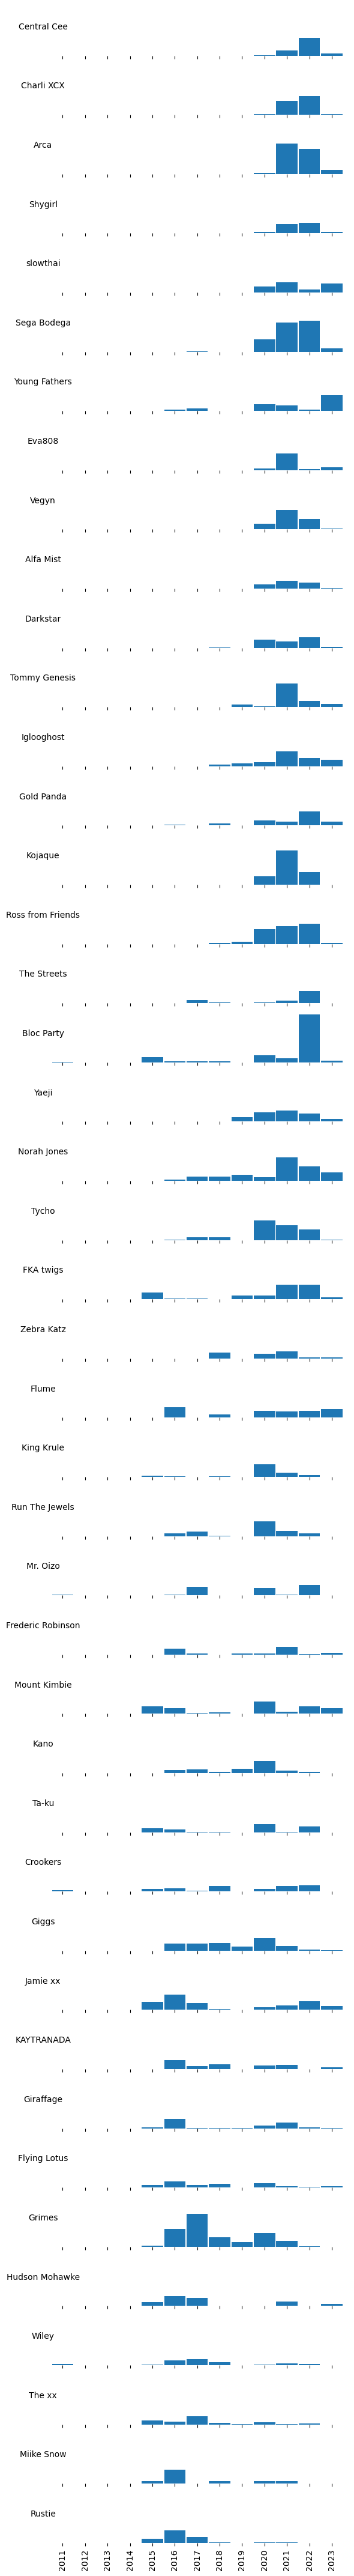

In [106]:
cols = 1
fig, ax = plt.subplots(math.ceil(len(artists)/cols), cols, figsize=(6,len(artists)/cols), sharex=True, sharey=True)
ax = ax.flatten()
for counter, artist in enumerate(artists):
    counts[artist].reindex(range(2011,2024), fill_value=0).plot(kind='bar', ax=ax[counter], width=0.95)
#     ax[counter].set_title(artist)
    ax[counter].set_xlabel('')
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)
    ax[counter].spines['bottom'].set_visible(False)
    ax[counter].spines['left'].set_visible(False)
    ax[counter].set_ylabel(artist, rotation="horizontal")
    ax[counter].set_yticks([])
fig.tight_layout()
plt.show()

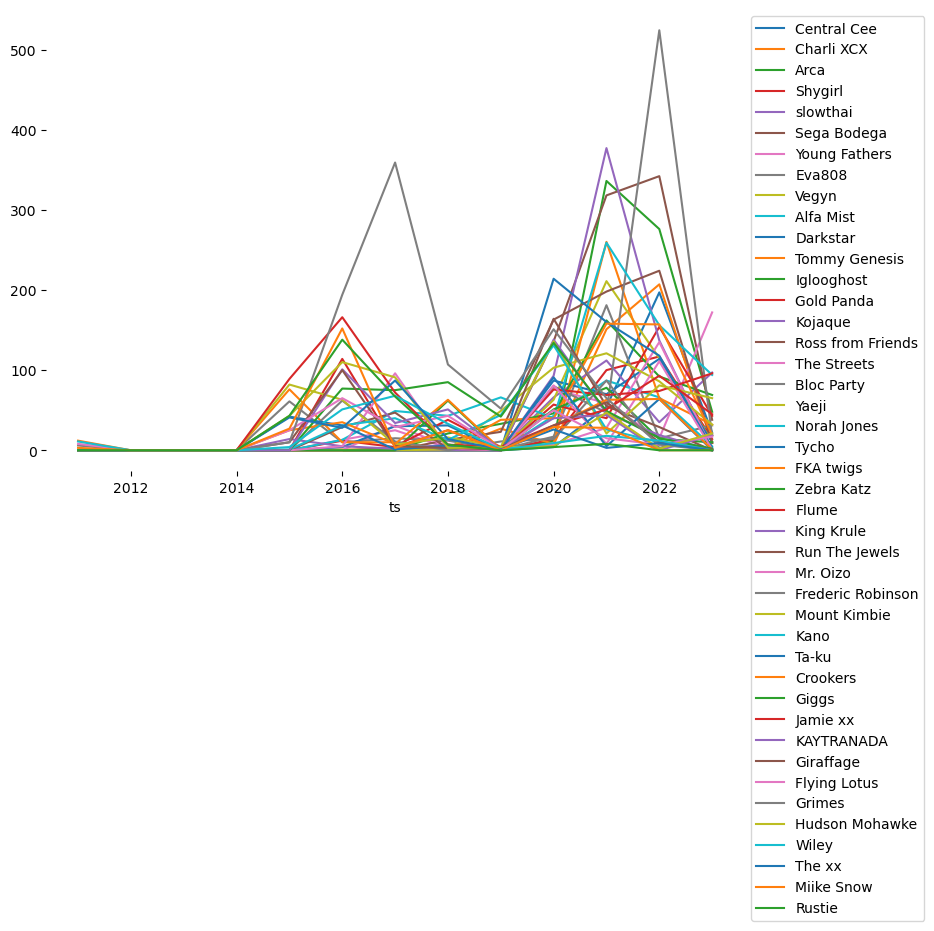

In [118]:
fig, ax = plt.subplots(figsize=(9,6))
for counter, artist in enumerate(artists):
    counts[artist].reindex(range(2011,2024), fill_value=0).plot(ax=ax, label=artist)
#     ax.set_title(artist)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [131]:
album_counts = df.groupby([df.master_metadata_album_album_name, df.ts.dt.year]).size()
albums = list(df.master_metadata_album_album_name.value_counts()[df.master_metadata_album_album_name.value_counts() > 150].index.values)
albums.sort(key=lambda x: (album_counts[x].index*album_counts[x]).sum()/album_counts[x].sum(), reverse=True)

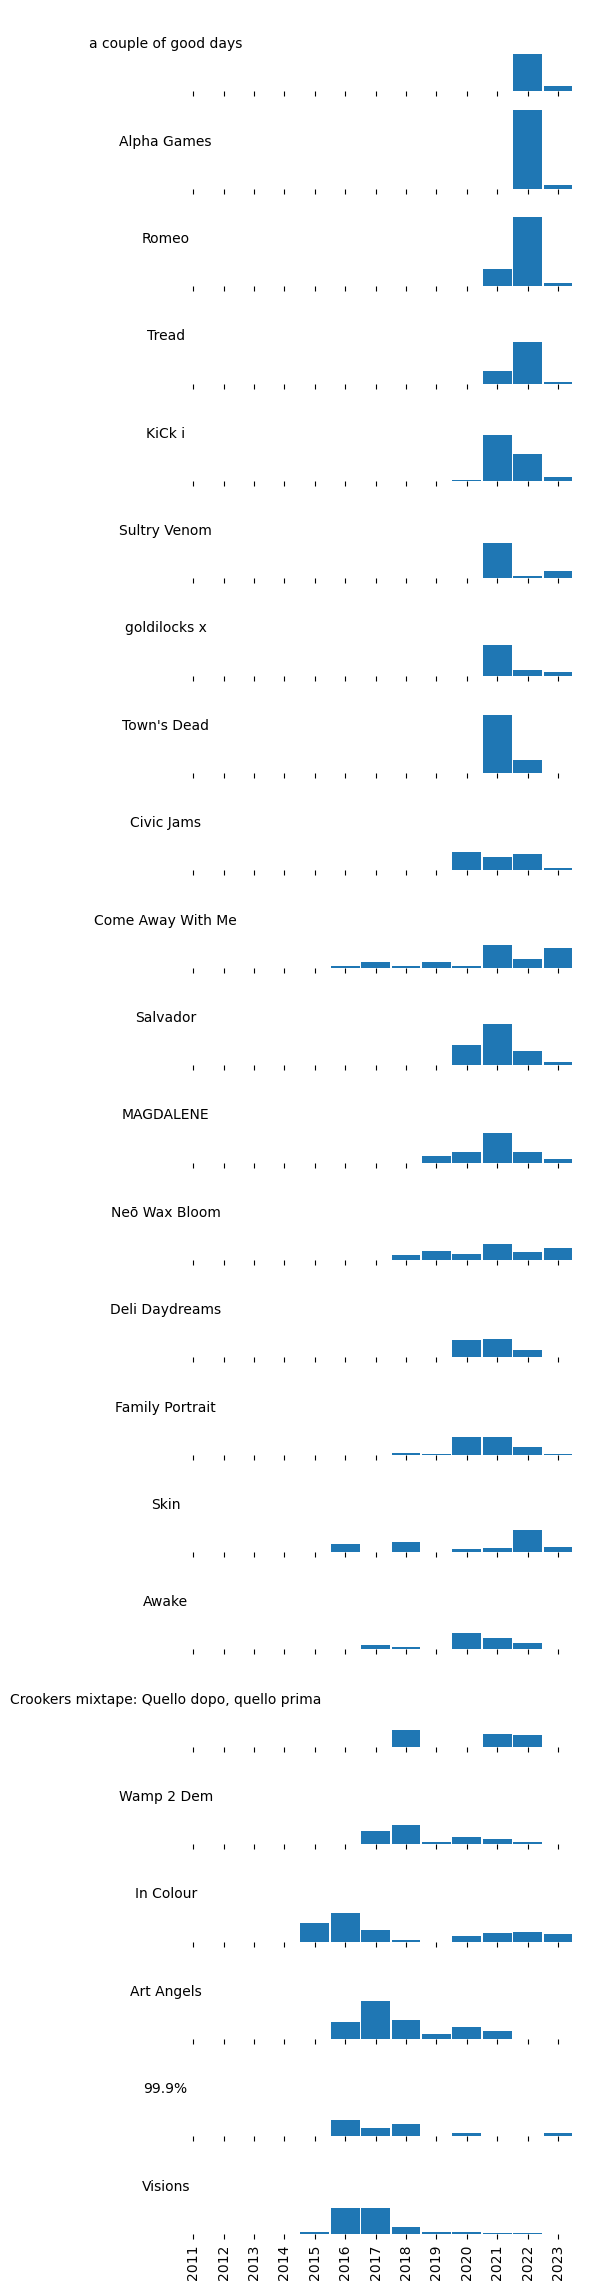

In [132]:
cols = 1
fig, ax = plt.subplots(math.ceil(len(albums)/cols), cols, figsize=(6,len(albums)/cols), sharex=True, sharey=True)
ax = ax.flatten()
for counter, artist in enumerate(albums):
    album_counts[artist].reindex(range(2011,2024), fill_value=0).plot(kind='bar', ax=ax[counter], width=0.95)
#     ax[counter].set_title(artist)
    ax[counter].set_xlabel('')
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)
    ax[counter].spines['bottom'].set_visible(False)
    ax[counter].spines['left'].set_visible(False)
    ax[counter].set_ylabel(artist, rotation="horizontal")
    ax[counter].set_yticks([])
fig.tight_layout()
plt.show()